1. Load Dataset
2. Model
(model, loss_func, optimizer, device)
3. Train Model
4. Test Model
5. Plot Loss (epoch>=30)

## 1. Load Dataset

In [12]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../torchvision_data", train=True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../torchvision_data", train=False, transform=trans, download = True)


In [29]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=256, shuffle=False)

## 2. Model
(model, loss_func, optimizer, device)

In [32]:
import torch.nn as nn

class LeNet(nn.Module):
    """ 二维卷积神经网络分类模型 """
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, padding=2), 
                                  nn.Sigmoid(), 
                                  nn.AvgPool2d(kernel_size=2, stride=2), 
                                 
                                  nn.Conv2d(6, 16, kernel_size=5), 
                                  nn.Sigmoid(), 
                                  nn.AvgPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(16*5*5, 120), 
                                nn.Sigmoid(), 
                                
                                nn.Linear(120, 84), 
                                nn.Sigmoid(), 
                                
                                nn.Linear(84, 10))
        
    def forward(self, x):
        """ 前向传播方法 """
        feat_map = self.conv(x)
        output = self.flatten(feat_map)
        return self.fc(output)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = LeNet().to(device)

## 3. Train Model
## 4. Test Model

In [42]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)

def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.to(device))
        loss = loss_func(y_hat, y.to(device))
        
        total_loss += loss.item()
    return total_loss / len(train_dataloader)

## 5. Plot Loss (epoch = 30)

In [45]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [47]:
n_epoch = 30

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)
    
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)
    

0.9162684722149625
0.749096880314198
0.6757997122216732
0.6247579696330618
0.5876147002615827
0.558301083838686
0.5336722985227057
0.5112658858299255
0.4895622685868689
0.4709820469643207
0.455251059887257
0.4424933543864717
0.4287807678922694
0.4214887569559381
0.4101995673585445
0.4028061843932943
0.3926121085248095
0.3846502777109755
0.37867669754839955
0.3733920600820095
0.3660959318597266
0.3610486550534025
0.3555115013680559
0.35068287189970626
0.34499307725023715
0.34417041521123115
0.33880763060234964
0.3323877622472479
0.3290728219011997
0.32624940066895586


In [49]:
print(len(train_loss_list))

30


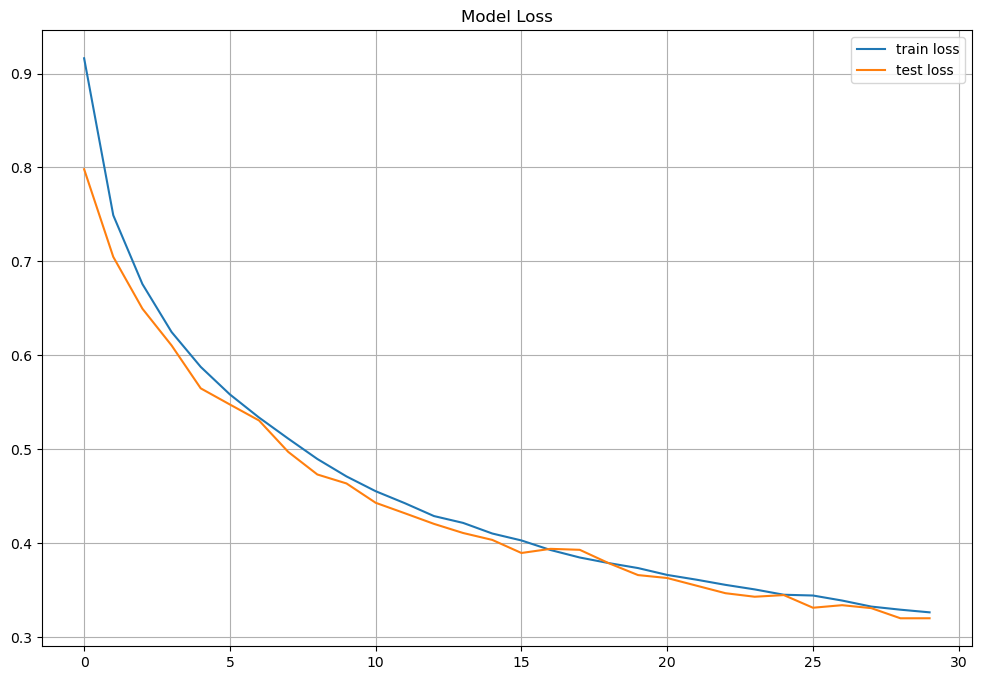

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()